<a href="https://colab.research.google.com/github/AlkaidCheng/GSOC_MLHEP/blob/master/Exercise/TaskII/QMLHEP_Exercise_Quantum_Computing_Part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QMLHEP Exercise Quantum Computing Part

* Install `cirq` library

In [1]:
!pip install cirq

### Task I - Implement a simple quantum operation with Cirq

* Importing libraries

In [0]:
import cirq
from cirq.ops import H, CNOT, SWAP,rx, measure
import numpy as np
from cirq.circuits import InsertStrategy

* Preparing the qubits

In [0]:
# Create a circuit with 5 qubits
q0, q1, q2, q3, q4 = [cirq.GridQubit(i, 0) for i in range(5)]

* Constructing the circuit

In [0]:
circuit = cirq.Circuit()
# Apply Hadamard operation on every qubit
circuit.append([H(q0),H(q1),H(q2),H(q3),H(q4)], strategy=InsertStrategy.NEW_THEN_INLINE)
# Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4)
circuit.append([CNOT(q0,q1),CNOT(q1,q2),CNOT(q2,q3),CNOT(q3,q4)])
# SWAP (0, 4)
circuit.append([SWAP(q0,q4)], strategy=InsertStrategy.NEW_THEN_INLINE)
# Rotate qubit 0 abouot the x axis by pi/2
circuit.append([rx(np.pi/2)(q0)])

* Visualizing the circuit

In [8]:
print(circuit)

(0, 0): ───H───@───────────────×───Rx(0.5π)───
               │               │
(1, 0): ───H───X───@───────────┼──────────────
                   │           │
(2, 0): ───H───────X───@───────┼──────────────
                       │       │
(3, 0): ───H───────────X───@───┼──────────────
                           │   │
(4, 0): ───H───────────────X───×──────────────


### Task II - Quantum Qubit Measurement

In [0]:
trials = 10000
Rx_theta = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2]
results = []
for theta in Rx_theta:
  # create a circuit
  circuit = cirq.Circuit()
  # apply Rx rotation by theta to the first qubit
  circuit.append([rx(theta)(q0)])
  # measure the qubit
  circuit.append([measure(q0, key = 'm')])
  simulator = cirq.Simulator()
  # do the measurements for `trials` times
  result = simulator.run(circuit, repetitions=trials).measurements['m']
  # count the number of times the qubit is in the 0 and 1 states
  N_state_1 = np.count_nonzero(result)
  N_state_0 = trials - N_state_1
  results.append({'0':N_state_0,'1':N_state_1})

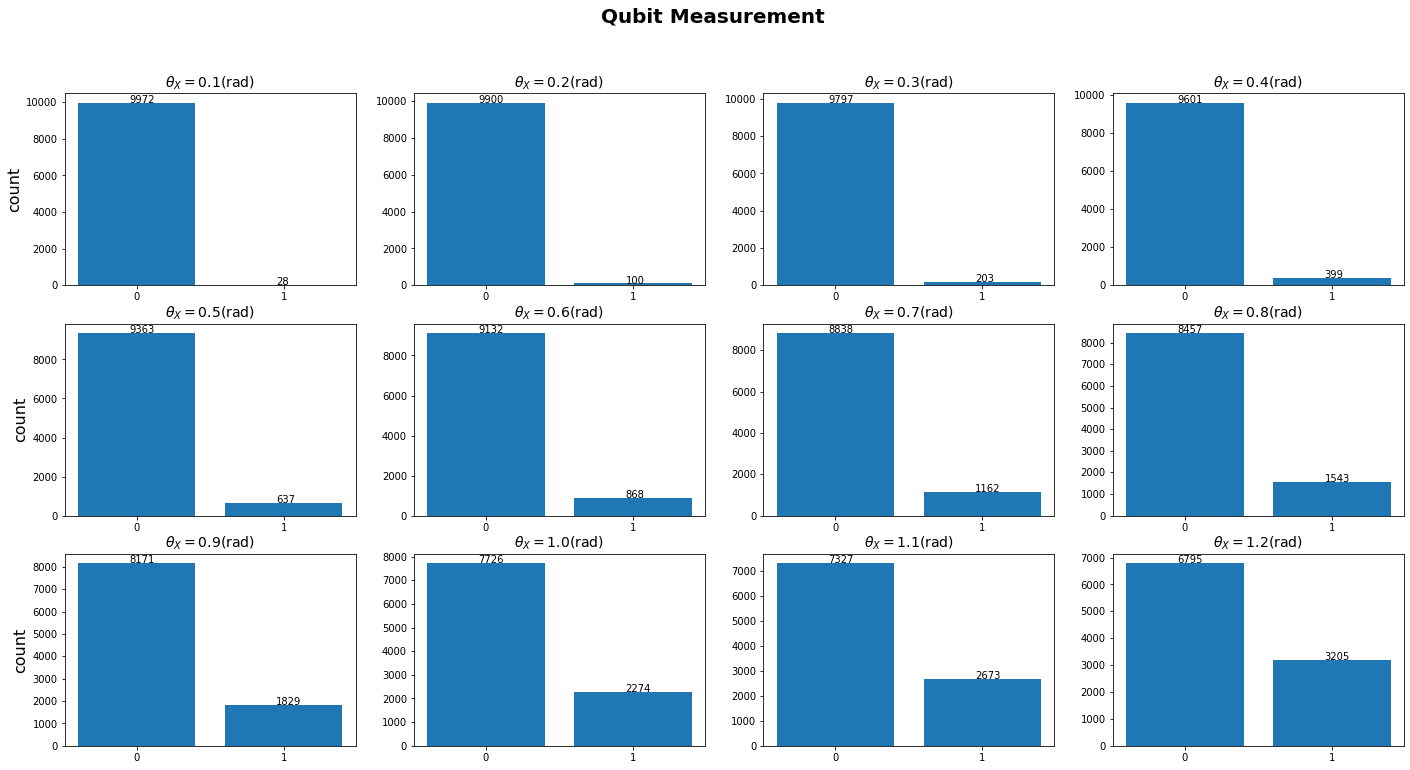

In [135]:
import matplotlib.pyplot as plt
# plot the results
plot_dimension = (3,4)
fig, axs = plt.subplots(plot_dimension[0], plot_dimension[1], figsize=(24, 12))
fig.suptitle('Qubit Measurement',fontsize = 20, fontweight='bold')
for i in range(plot_dimension[0]):
  for j in range(plot_dimension[1]):
    index = i*plot_dimension[1]+j
    X = results[index].keys()
    Y = results[index].values()
    axs[i][j].bar(X,Y)
    if j == 0:
      axs[i][j].set_ylabel('count', fontsize=16)
    axs[i][j].set_title(r'$\theta_X = {} $(rad)'.format(Rx_list[i*plot_dimension[1]+j]), fontsize=14)
    for n,v in enumerate(Y):
      axs[i][j].text(n -0.05, v+2, str(int(v)), color='black')